In [1]:
"""
    openCV에서 사용할 수 있는 crop 함수
    4분할된 이미지 리스트 반환
"""

def image_crop(file, image_width, image_height, cropped_width, cropped_height):
    cropped_images = []
    x = 0
    
    while x < image_width:
        y = 0
        while y < image_height:
            cropped_image = file[x : x + cropped_width, y : y + cropped_height]
            cropped_images.append(cropped_image)
            y += cropped_height
        x += cropped_width
    
    return cropped_images

In [2]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file , cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [3]:
import random

"""이미지 증강 함수"""

def image_augmentation(files, index, limit, image_width, image_height):
    random_num = []
    X_array =[]
    y_array = []
    images = []
    data = []
    
    while len(images) <= (limit - 4):
        print('********************len(images)=', len(images))
        try:
            while (len(random_num) < len(files)):
                i = random.randrange(len(files))
                
                print('i=', i)
                print('random_num=')
                print(random_num)
                print('len(random_num)=', len(random_num))
                
                if (i not in random_num) :
                        
                    random_num.append(i)
                    
                    file = files[i]
            
                    img = data_generator(file, image_width, image_height)

                    images.append(img)
                    images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # 시계 방향으로 90도 회전
                    images.append(cv2.rotate(img, cv2.ROTATE_180))  # 180도 회전
                    images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)) # 반시계 방향 90도 회전
                    
                    
                else : # i in random_num
                    continue
                    


                
            #for image in images:
             #   data = np.asarray(image)
              #  X_array.append(data)
               # y_array.append(index)
                #if len(X_array) >= limit:
                 #   break
        
        except Exception as e:
            print(e)
            print('aug: '+ str(i)+" 번째에서 에러 ")
            #             remove(f)
    
    for image in images:
        cropped_images = image_crop(image, image_width, image_height, image_width // 2, image_height // 2)
        for cropped_image in cropped_images:
            data = np.asarray(cropped_image)
            X_array.append(data)
            y_array.append(index)
    

    
    return X_array, y_array

In [4]:
import random

"""이미지 뽑기 함수"""

def image_selector(files, index, limit, image_width, image_height):
    random_files = []
    random_num = []
    X_array = []
    y_array = []
    data = []
        
    while len(random_num) < limit:
        rand = random.randrange(len(files))
        if rand not in random_num or len(random_num) == len(files):
            random_num.append(rand)
            random_files.append(files[rand])
            
    
#     print(random_files)
    
    for i, f in enumerate(random_files):
        try:
            img = data_generator(f, image_width, image_height)
            cropped_images = image_crop(img, image_width, image_height, image_width // 2, image_height // 2)
            
            for image in cropped_images:
                data = np.asarray(image)
                X_array.append(data)
                y_array.append(index)

        except Exception as e:
            print(e)
            print('select'+str(i)+" 번째에서 에러 ")
    #             remove(f)
            
    return X_array, y_array

In [6]:
import os, glob

"""하위 폴더 및 파일 탐색"""
    
def is_dir_file(dir_path, dir_list, img_limit, img_limit_list):
    
    folders = os.listdir(dir_path)
    
    for folder in folders:
        path_detail = os.path.join(dir_path, folder)
        
        if os.path.isdir(path_detail):
            new_img_limit = int(img_limit / len(folders))   
            is_dir_file(path_detail, dir_list, new_img_limit, img_limit_list)
        else:    
            print(dir_path + ' img limit : ' + str(img_limit))
            dir_list.append(dir_path)
            img_limit_list.append(img_limit)
            return

In [7]:
#본 코드 시작

import cv2
import os, glob
from os import remove
import numpy as np

img_dir = './binary_cnn_majority/train'
categories = ['ad', 'non_ad']
#categories = os.listdir(img_dir)

size = 180

sum = 0
ad_index = 0
non_ad_index = 1
image_width, image_height = size, size

# file_directory = []
file_list_index = []
img_limit_list = []
X = []
y = []

In [8]:
np_classes = len(categories)    
print(categories)

for i, category in enumerate(categories):
    file_directory = []
    img_dir_detail = os.path.join(img_dir, category)
    
    if i == ad_index:
        img_limit = 1600
    elif i == non_ad_index:
        img_limit = 1600
        
    is_dir_file(img_dir_detail, file_directory, img_limit, img_limit_list)
    
    for directory in file_directory:
        file_list_index.append([i, directory])
#     file_list_index.append([i, file_directory])
    
# print(file_directory)
print(file_list_index)

['ad', 'non_ad']
./binary_cnn_majority/train\ad\bill img limit : 145
./binary_cnn_majority/train\ad\coin img limit : 145
./binary_cnn_majority/train\ad\general_product img limit : 145
./binary_cnn_majority/train\ad\graph img limit : 145
./binary_cnn_majority/train\ad\human img limit : 145
./binary_cnn_majority/train\ad\lotto_N img limit : 145
./binary_cnn_majority/train\ad\lotto_P img limit : 145
./binary_cnn_majority/train\ad\microbe img limit : 145
./binary_cnn_majority/train\ad\part_of_human img limit : 145
./binary_cnn_majority/train\ad\photoshop img limit : 145
./binary_cnn_majority/train\ad\picture img limit : 145
./binary_cnn_majority/train\non_ad img limit : 1600
[[0, './binary_cnn_majority/train\\ad\\bill'], [0, './binary_cnn_majority/train\\ad\\coin'], [0, './binary_cnn_majority/train\\ad\\general_product'], [0, './binary_cnn_majority/train\\ad\\graph'], [0, './binary_cnn_majority/train\\ad\\human'], [0, './binary_cnn_majority/train\\ad\\lotto_N'], [0, './binary_cnn_majority/

In [9]:
for lst in file_list_index:
#     print(lst)
    print(lst[0])

count = 0

0
0
0
0
0
0
0
0
0
0
0
1


In [10]:
print('img_limit_list******')
print(img_limit_list)

for index, directory in file_list_index:
    print(directory)
    files = glob.glob(directory + "/*.jpg")
    print(directory + 'glob 완료')
    len_file = len(files) # 해당 디렉토리 내 파일 개수
    print('len_file=')
    print(len_file)

    img_limit = img_limit_list[count]
    print('count=', count)
    print('img_limit =')
    print(img_limit)

    if len_file <img_limit:
        X_temp, y_temp = image_augmentation(files, index, img_limit, image_width, image_height)
        print(directory + 'image aug 완료')
    else:
        X_temp, y_temp = image_selector(files, index, img_limit, image_width, image_height)
        print(directory + 'image select 완료')


    X = X + X_temp
    y = y + y_temp

    len_file = len(X_temp)
    print(directory + '파일 길이 : ' + str(len_file))
    sum += len_file
    count += 1
        
    
print('총 파일 길이 : ' + str(sum))

X = np.array(X)
Y = np.array(y)

print(len(X), len(Y))

"""이미지 크기 인자를 조절하면서 적용"""

img_limit_list******
[145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 1600]
./binary_cnn_majority/train\ad\bill
./binary_cnn_majority/train\ad\billglob 완료
len_file=
94
count= 0
img_limit =
145
********************len(images)= 0
i= 34
random_num=
[]
len(random_num)= 0
i= 38
random_num=
[34]
len(random_num)= 1
i= 91
random_num=
[34, 38]
len(random_num)= 2
i= 54
random_num=
[34, 38, 91]
len(random_num)= 3
i= 27
random_num=
[34, 38, 91, 54]
len(random_num)= 4
i= 0
random_num=
[34, 38, 91, 54, 27]
len(random_num)= 5
i= 81
random_num=
[34, 38, 91, 54, 27, 0]
len(random_num)= 6
i= 10
random_num=
[34, 38, 91, 54, 27, 0, 81]
len(random_num)= 7
i= 66
random_num=
[34, 38, 91, 54, 27, 0, 81, 10]
len(random_num)= 8
i= 82
random_num=
[34, 38, 91, 54, 27, 0, 81, 10, 66]
len(random_num)= 9
i= 76
random_num=
[34, 38, 91, 54, 27, 0, 81, 10, 66, 82]
len(random_num)= 10
i= 71
random_num=
[34, 38, 91, 54, 27, 0, 81, 10, 66, 82, 76]
len(random_num)= 11
i= 25
random_num=
[34, 38, 91, 54, 27, 0, 81, 10

len(random_num)= 55
i= 84
random_num=
[34, 38, 91, 54, 27, 0, 81, 10, 66, 82, 76, 71, 25, 26, 20, 74, 2, 85, 67, 11, 48, 36, 86, 83, 50, 53, 33, 32, 77, 4, 47, 56, 61, 45, 14, 30, 90, 51, 16, 3, 84, 12, 9, 62, 1, 29, 5, 41, 28, 78, 21, 80, 35, 52, 23]
len(random_num)= 55
i= 24
random_num=
[34, 38, 91, 54, 27, 0, 81, 10, 66, 82, 76, 71, 25, 26, 20, 74, 2, 85, 67, 11, 48, 36, 86, 83, 50, 53, 33, 32, 77, 4, 47, 56, 61, 45, 14, 30, 90, 51, 16, 3, 84, 12, 9, 62, 1, 29, 5, 41, 28, 78, 21, 80, 35, 52, 23]
len(random_num)= 55
i= 0
random_num=
[34, 38, 91, 54, 27, 0, 81, 10, 66, 82, 76, 71, 25, 26, 20, 74, 2, 85, 67, 11, 48, 36, 86, 83, 50, 53, 33, 32, 77, 4, 47, 56, 61, 45, 14, 30, 90, 51, 16, 3, 84, 12, 9, 62, 1, 29, 5, 41, 28, 78, 21, 80, 35, 52, 23, 24]
len(random_num)= 56
i= 9
random_num=
[34, 38, 91, 54, 27, 0, 81, 10, 66, 82, 76, 71, 25, 26, 20, 74, 2, 85, 67, 11, 48, 36, 86, 83, 50, 53, 33, 32, 77, 4, 47, 56, 61, 45, 14, 30, 90, 51, 16, 3, 84, 12, 9, 62, 1, 29, 5, 41, 28, 78, 21, 80, 35

i= 8
random_num=
[16, 12, 33, 29, 59, 43, 40, 23, 60, 26, 54, 37, 21, 3, 38, 34, 14, 20, 47, 22]
len(random_num)= 20
i= 25
random_num=
[16, 12, 33, 29, 59, 43, 40, 23, 60, 26, 54, 37, 21, 3, 38, 34, 14, 20, 47, 22, 8]
len(random_num)= 21
i= 53
random_num=
[16, 12, 33, 29, 59, 43, 40, 23, 60, 26, 54, 37, 21, 3, 38, 34, 14, 20, 47, 22, 8, 25]
len(random_num)= 22
i= 9
random_num=
[16, 12, 33, 29, 59, 43, 40, 23, 60, 26, 54, 37, 21, 3, 38, 34, 14, 20, 47, 22, 8, 25, 53]
len(random_num)= 23
i= 34
random_num=
[16, 12, 33, 29, 59, 43, 40, 23, 60, 26, 54, 37, 21, 3, 38, 34, 14, 20, 47, 22, 8, 25, 53, 9]
len(random_num)= 24
i= 49
random_num=
[16, 12, 33, 29, 59, 43, 40, 23, 60, 26, 54, 37, 21, 3, 38, 34, 14, 20, 47, 22, 8, 25, 53, 9]
len(random_num)= 24
i= 4
random_num=
[16, 12, 33, 29, 59, 43, 40, 23, 60, 26, 54, 37, 21, 3, 38, 34, 14, 20, 47, 22, 8, 25, 53, 9, 49]
len(random_num)= 25
i= 2
random_num=
[16, 12, 33, 29, 59, 43, 40, 23, 60, 26, 54, 37, 21, 3, 38, 34, 14, 20, 47, 22, 8, 25, 53, 9,

./binary_cnn_majority/train\ad\general_productimage select 완료
./binary_cnn_majority/train\ad\general_product파일 길이 : 580
./binary_cnn_majority/train\ad\graph
./binary_cnn_majority/train\ad\graphglob 완료
len_file=
76
count= 3
img_limit =
145
********************len(images)= 0
i= 53
random_num=
[]
len(random_num)= 0
i= 61
random_num=
[53]
len(random_num)= 1
i= 43
random_num=
[53, 61]
len(random_num)= 2
i= 5
random_num=
[53, 61, 43]
len(random_num)= 3
i= 42
random_num=
[53, 61, 43, 5]
len(random_num)= 4
i= 67
random_num=
[53, 61, 43, 5, 42]
len(random_num)= 5
i= 66
random_num=
[53, 61, 43, 5, 42, 67]
len(random_num)= 6
i= 1
random_num=
[53, 61, 43, 5, 42, 67, 66]
len(random_num)= 7
i= 64
random_num=
[53, 61, 43, 5, 42, 67, 66, 1]
len(random_num)= 8
i= 60
random_num=
[53, 61, 43, 5, 42, 67, 66, 1, 64]
len(random_num)= 9
i= 7
random_num=
[53, 61, 43, 5, 42, 67, 66, 1, 64, 60]
len(random_num)= 10
i= 58
random_num=
[53, 61, 43, 5, 42, 67, 66, 1, 64, 60, 7]
len(random_num)= 11
i= 38
random_num=


i= 14
random_num=
[53, 61, 43, 5, 42, 67, 66, 1, 64, 60, 7, 58, 38, 16, 65, 62, 46, 45, 17, 73, 40, 27, 6, 12, 49, 51, 74, 44, 36, 13, 10, 2, 3, 39, 11, 54, 34, 63, 59, 55, 70, 9, 41, 48, 14, 33, 35, 0, 68, 19, 28, 32, 4, 50, 75, 69, 15, 20, 57, 56, 23, 47, 37, 18]
len(random_num)= 64
i= 53
random_num=
[53, 61, 43, 5, 42, 67, 66, 1, 64, 60, 7, 58, 38, 16, 65, 62, 46, 45, 17, 73, 40, 27, 6, 12, 49, 51, 74, 44, 36, 13, 10, 2, 3, 39, 11, 54, 34, 63, 59, 55, 70, 9, 41, 48, 14, 33, 35, 0, 68, 19, 28, 32, 4, 50, 75, 69, 15, 20, 57, 56, 23, 47, 37, 18]
len(random_num)= 64
i= 29
random_num=
[53, 61, 43, 5, 42, 67, 66, 1, 64, 60, 7, 58, 38, 16, 65, 62, 46, 45, 17, 73, 40, 27, 6, 12, 49, 51, 74, 44, 36, 13, 10, 2, 3, 39, 11, 54, 34, 63, 59, 55, 70, 9, 41, 48, 14, 33, 35, 0, 68, 19, 28, 32, 4, 50, 75, 69, 15, 20, 57, 56, 23, 47, 37, 18]
len(random_num)= 64
i= 61
random_num=
[53, 61, 43, 5, 42, 67, 66, 1, 64, 60, 7, 58, 38, 16, 65, 62, 46, 45, 17, 73, 40, 27, 6, 12, 49, 51, 74, 44, 36, 13, 10, 2, 

./binary_cnn_majority/train\ad\graphimage aug 완료
./binary_cnn_majority/train\ad\graph파일 길이 : 1216
./binary_cnn_majority/train\ad\human
./binary_cnn_majority/train\ad\humanglob 완료
len_file=
642
count= 4
img_limit =
145
./binary_cnn_majority/train\ad\humanimage select 완료
./binary_cnn_majority/train\ad\human파일 길이 : 580
./binary_cnn_majority/train\ad\lotto_N
./binary_cnn_majority/train\ad\lotto_Nglob 완료
len_file=
36
count= 5
img_limit =
145
********************len(images)= 0
i= 34
random_num=
[]
len(random_num)= 0
i= 31
random_num=
[34]
len(random_num)= 1
i= 17
random_num=
[34, 31]
len(random_num)= 2
i= 31
random_num=
[34, 31, 17]
len(random_num)= 3
i= 32
random_num=
[34, 31, 17]
len(random_num)= 3
i= 17
random_num=
[34, 31, 17, 32]
len(random_num)= 4
i= 23
random_num=
[34, 31, 17, 32]
len(random_num)= 4
i= 20
random_num=
[34, 31, 17, 32, 23]
len(random_num)= 5
i= 26
random_num=
[34, 31, 17, 32, 23, 20]
len(random_num)= 6
i= 19
random_num=
[34, 31, 17, 32, 23, 20, 26]
len(random_num)= 7
i=

i= 12
random_num=
[3, 0, 21, 25, 27, 30, 14]
len(random_num)= 7
i= 17
random_num=
[3, 0, 21, 25, 27, 30, 14, 12]
len(random_num)= 8
i= 2
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17]
len(random_num)= 9
i= 28
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2]
len(random_num)= 10
i= 20
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2, 28]
len(random_num)= 11
i= 8
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2, 28, 20]
len(random_num)= 12
i= 19
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2, 28, 20, 8]
len(random_num)= 13
i= 36
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2, 28, 20, 8, 19]
len(random_num)= 14
i= 0
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2, 28, 20, 8, 19, 36]
len(random_num)= 15
i= 25
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2, 28, 20, 8, 19, 36]
len(random_num)= 15
i= 16
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2, 28, 20, 8, 19, 36]
len(random_num)= 15
i= 6
random_num=
[3, 0, 21, 25, 27, 30, 14, 12, 17, 2, 28, 20, 8, 19, 36, 16]
len(random_num)= 1

i= 32
random_num=
[25, 54, 32, 23, 12, 37, 38, 43, 7, 3, 47, 60, 27, 59, 15, 31, 14, 61, 39, 28, 45, 19, 57, 17, 51, 40, 41, 55, 50]
len(random_num)= 29
i= 51
random_num=
[25, 54, 32, 23, 12, 37, 38, 43, 7, 3, 47, 60, 27, 59, 15, 31, 14, 61, 39, 28, 45, 19, 57, 17, 51, 40, 41, 55, 50]
len(random_num)= 29
i= 25
random_num=
[25, 54, 32, 23, 12, 37, 38, 43, 7, 3, 47, 60, 27, 59, 15, 31, 14, 61, 39, 28, 45, 19, 57, 17, 51, 40, 41, 55, 50]
len(random_num)= 29
i= 16
random_num=
[25, 54, 32, 23, 12, 37, 38, 43, 7, 3, 47, 60, 27, 59, 15, 31, 14, 61, 39, 28, 45, 19, 57, 17, 51, 40, 41, 55, 50]
len(random_num)= 29
i= 27
random_num=
[25, 54, 32, 23, 12, 37, 38, 43, 7, 3, 47, 60, 27, 59, 15, 31, 14, 61, 39, 28, 45, 19, 57, 17, 51, 40, 41, 55, 50, 16]
len(random_num)= 30
i= 13
random_num=
[25, 54, 32, 23, 12, 37, 38, 43, 7, 3, 47, 60, 27, 59, 15, 31, 14, 61, 39, 28, 45, 19, 57, 17, 51, 40, 41, 55, 50, 16]
len(random_num)= 30
i= 23
random_num=
[25, 54, 32, 23, 12, 37, 38, 43, 7, 3, 47, 60, 27, 59, 1

./binary_cnn_majority/train\ad\part_of_humanimage select 완료
./binary_cnn_majority/train\ad\part_of_human파일 길이 : 580
./binary_cnn_majority/train\ad\photoshop
./binary_cnn_majority/train\ad\photoshopglob 완료
len_file=
862
count= 9
img_limit =
145
./binary_cnn_majority/train\ad\photoshopimage select 완료
./binary_cnn_majority/train\ad\photoshop파일 길이 : 580
./binary_cnn_majority/train\ad\picture
./binary_cnn_majority/train\ad\pictureglob 완료
len_file=
225
count= 10
img_limit =
145
OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

select115 번째에서 에러 
OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

select144 번째에서 에러 
./binary_cnn_majority/train\ad\pictureimage select 완료
./binary_cnn_majority/train\ad\picture파일 길이 : 572
./binary_cnn_majority/train\non_ad
./binary_cnn_majority/

i= 328
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331]
len(random_num)= 52
i= 395
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328]
len(random_num)= 53
i= 103
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395]
len(random_num)= 54
i= 254
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244,

random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45]
len(random_num)= 85
i= 305
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236]
len(random_num)= 86
i= 378
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107,

i= 16
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300]
len(random_num)= 104
i= 276
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126

i= 228
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208]
len(random_num)= 121
i= 221
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138,

i= 41
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271]
len(random_num)= 138
i= 8
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180,

i= 125
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132]
len(random_num)= 157
i= 307
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367,

i= 398
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93]
len(random_num)= 172
i= 172
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187,

i= 137
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19]
len(random_num)= 190
i= 347
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 

i= 259
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 34

i= 68
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 340

i= 320
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 34

i= 139
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 34

random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 340, 298,

i= 311
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 34

i= 42
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 340

i= 45
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 340

i= 140
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 34

i= 395
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 351, 222, 160, 281, 34

len(random_num)= 386
i= 181
random_num=
[321, 140, 374, 47, 232, 182, 171, 294, 102, 119, 256, 197, 384, 212, 205, 28, 41, 111, 177, 107, 244, 333, 125, 57, 187, 87, 165, 240, 94, 386, 277, 364, 139, 198, 121, 100, 227, 99, 11, 367, 254, 173, 185, 54, 370, 33, 290, 307, 52, 324, 95, 331, 328, 395, 103, 278, 210, 5, 170, 180, 266, 398, 375, 27, 91, 348, 105, 301, 356, 344, 311, 22, 302, 55, 220, 75, 138, 143, 30, 179, 273, 169, 201, 78, 45, 236, 305, 378, 174, 309, 118, 239, 379, 126, 279, 327, 127, 336, 215, 90, 366, 92, 0, 300, 16, 276, 53, 37, 218, 303, 343, 323, 365, 96, 382, 129, 246, 238, 172, 86, 208, 228, 221, 146, 123, 158, 368, 60, 352, 76, 204, 162, 233, 207, 209, 117, 259, 271, 8, 320, 322, 164, 396, 17, 241, 312, 191, 394, 268, 109, 216, 275, 249, 50, 156, 387, 132, 350, 329, 101, 36, 153, 104, 349, 342, 314, 393, 206, 319, 3, 113, 93, 280, 42, 1, 40, 148, 270, 193, 61, 230, 347, 56, 157, 110, 392, 24, 195, 79, 19, 137, 62, 345, 49, 363, 330, 341, 274, 152, 338, 217, 282, 3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train.shape)
# print(X_train.shape[0])
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))'''

(11373, 90, 90, 3)
(11373,)
(3791, 90, 90, 3)
(3791,)
[6547 4826]
[2217 1574]


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [12]:
X = X.astype('float32') / 255

모델 아키텍처 설정

In [14]:
# import os
# import keras.backend.tensorflow_backend as K
from tensorflow.keras import optimizers

lrate=0.009
op = optimizers.RMSprop(lr=lrate)

dr = 0.15

# with K.tf_ops.device('/device:GPU:0'):
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=X.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(dr))

model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(dr))


model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dr))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
#model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dr))
model.add(BatchNormalization())

#model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
#model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
# model.add(Dropout(0.15))
#model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(dr))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 45, 45, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)       

모델 훈련

In [17]:
batch = 32
epoch = 40

history = model.fit(X, Y, batch_size=batch, epochs=epoch, validation_split=0.15, verbose=1)

Epoch 1/40
404/404 [==============================] - 106s 260ms/step - loss: 1.3104 - accuracy: 0.6357 - val_loss: 1.6278 - val_accuracy: 0.0000e+00
Epoch 2/40
404/404 [==============================] - 124s 307ms/step - loss: 0.5659 - accuracy: 0.7157 - val_loss: 4.7504 - val_accuracy: 0.0804
Epoch 3/40
404/404 [==============================] - 125s 310ms/step - loss: 0.4813 - accuracy: 0.7897 - val_loss: 2.5063 - val_accuracy: 0.0176
Epoch 4/40
404/404 [==============================] - 127s 315ms/step - loss: 0.4363 - accuracy: 0.8165 - val_loss: 2.1188 - val_accuracy: 0.0378
Epoch 5/40
404/404 [==============================] - 128s 316ms/step - loss: 0.3832 - accuracy: 0.8394 - val_loss: 0.2075 - val_accuracy: 0.9350
Epoch 6/40
404/404 [==============================] - 126s 311ms/step - loss: 0.3876 - accuracy: 0.8363 - val_loss: 5.8746 - val_accuracy: 0.0149
Epoch 7/40
404/404 [==============================] - 126s 312ms/step - loss: 0.3908 - accuracy: 0.8449 - val_loss: 2.63

In [18]:
model.save('./binary_cnn_majority/model/size/binary_model_saved' + str(size) + '.h5')

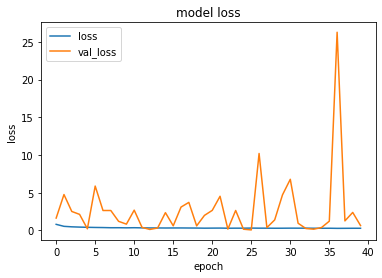

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

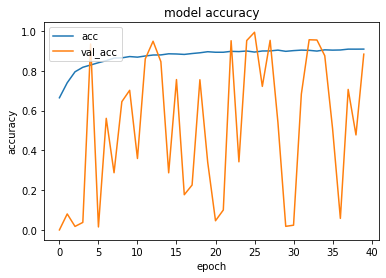

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'] )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [21]:
print(X.shape)

(15180, 90, 90, 3)
